Import libraries / Dependencies

In [2]:
#Data manipulation & Visualization libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the data which is in CSV file, to avoide encoding error, use unicode escape
df= pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')

In [4]:
#print the first 5 rows from your dataframe by default
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
#print the last 5 rows from your dataframe by default
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [6]:

# shows the total number of rows and columns in a dataframe
df.shape

(11251, 15)

Data Cleaning


In [7]:
# Give more information about your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# drop unrelated/black columns
df.drop(['unnamed1', 'Status'], axis= 1, inplace= True)

In [9]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:

# remove/drop null values
df.dropna(inplace= True)

In [11]:
# Changing the datatype of a particular column of a dataframe
df['Amount']= df['Amount'].astype('int')

In [12]:
df['Amount'].dtype

dtype('int64')

In [13]:
# to get 5 point summary 
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis (EDA)


In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Gender

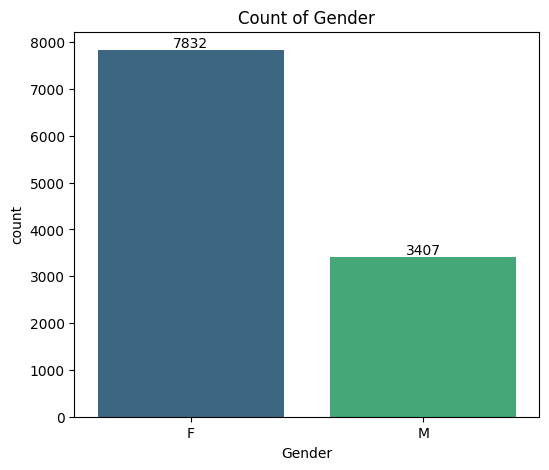

In [16]:
# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(6,5))
# create the countplot to see the distribution of data
cp= sns.countplot(x= 'Gender', data= df, palette= 'viridis', legend= False)
plt.title('Count of Gender')

# add lebels to the bars
for bar in cp.containers:
    cp.bar_label(bar)

<Axes: xlabel='Gender', ylabel='Amount'>

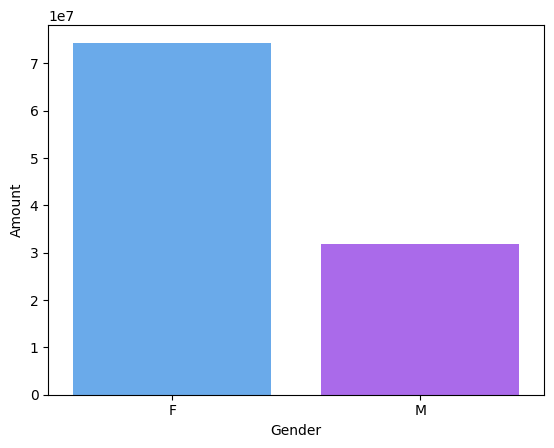

In [17]:
# Set the size of the plot (Adjust width and height as needed)
plt.Figure(figsize= (5,6))

# grouping my gender column based on amount column
bp= df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

# creating a bar plot
sns.barplot(x= 'Gender', y='Amount', data= bp, palette= 'cool',hue= 'Gender',  legend= False)


>>Insights: From the above graphs, we can see that the most of the buyers are females and even have greater purchasing power than man

Age Group


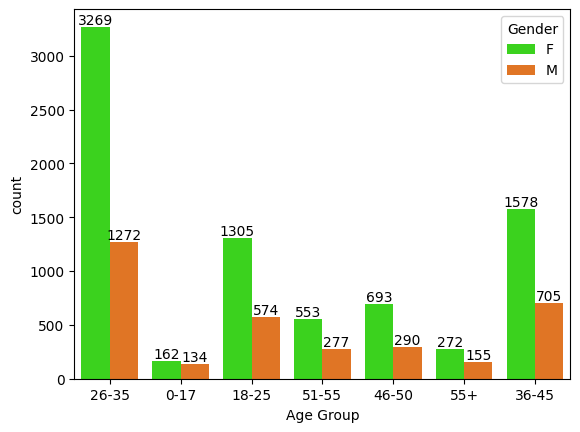

In [18]:
# Set the size of the plot (Adjust width and height as needed)
plt.Figure(figsize=(7,4))

# create the countplot to see the distribution of data
dp= sns.countplot(x= 'Age Group', data= df, hue= 'Gender', palette='gist_ncar')


#add lebels to the barsc
for bar in dp.containers:
    dp.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

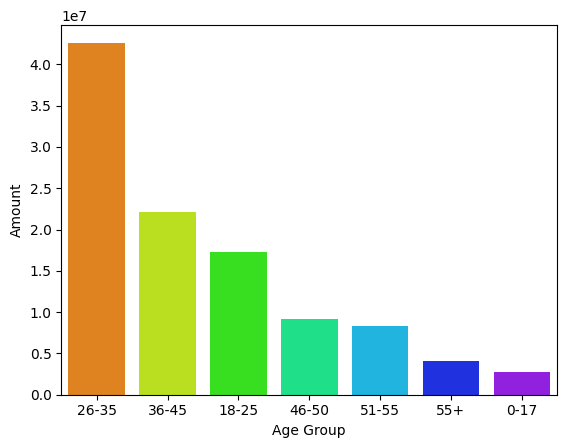

In [20]:
# Set the size of the plot (Adjust width and height as needed)
plt.Figure(figsize=(7,4))


# grouping my age group column based on amount column
cp= df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)


# creating a bar plot
sns.barplot(x= 'Age Group', y='Amount', data= cp, palette= 'gist_rainbow', hue='Age Group', legend= False)

>>From above graphs we can see that the most of the buyers are from the age group of 26-35 and are women


State

<Axes: xlabel='State', ylabel='Orders'>

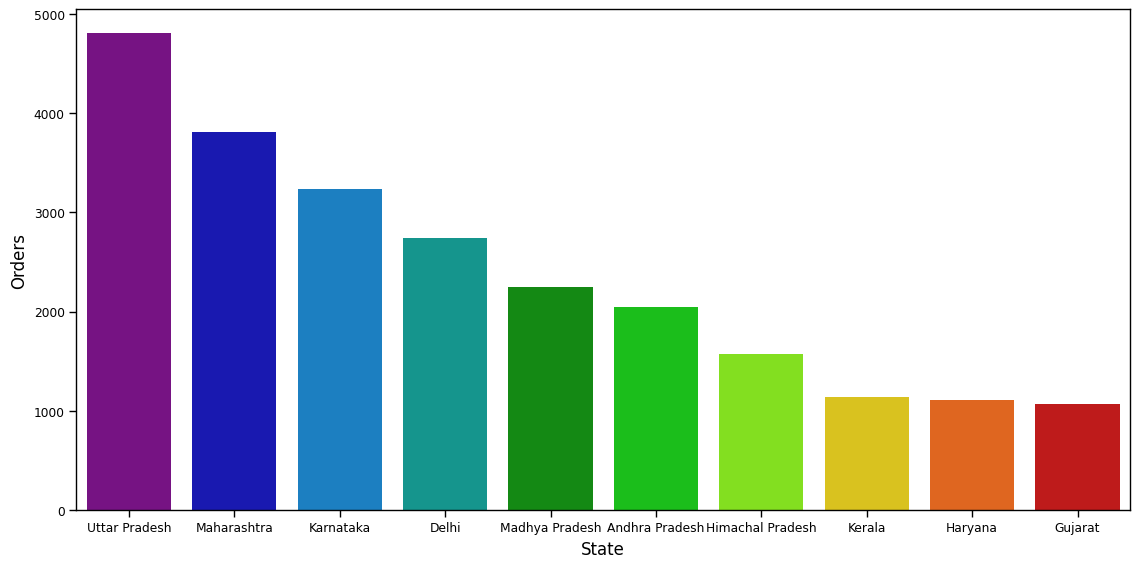

In [31]:
# total number of orders from top 10 states


# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})



# grouping my state column based on orders column
dp= df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by= 'Orders', ascending=False).head(10)


# creating a bar plot
sns.barplot(x= 'State', y= 'Orders', data= dp, palette='nipy_spectral', hue= 'State', legend= False)

<Axes: xlabel='State', ylabel='Amount'>

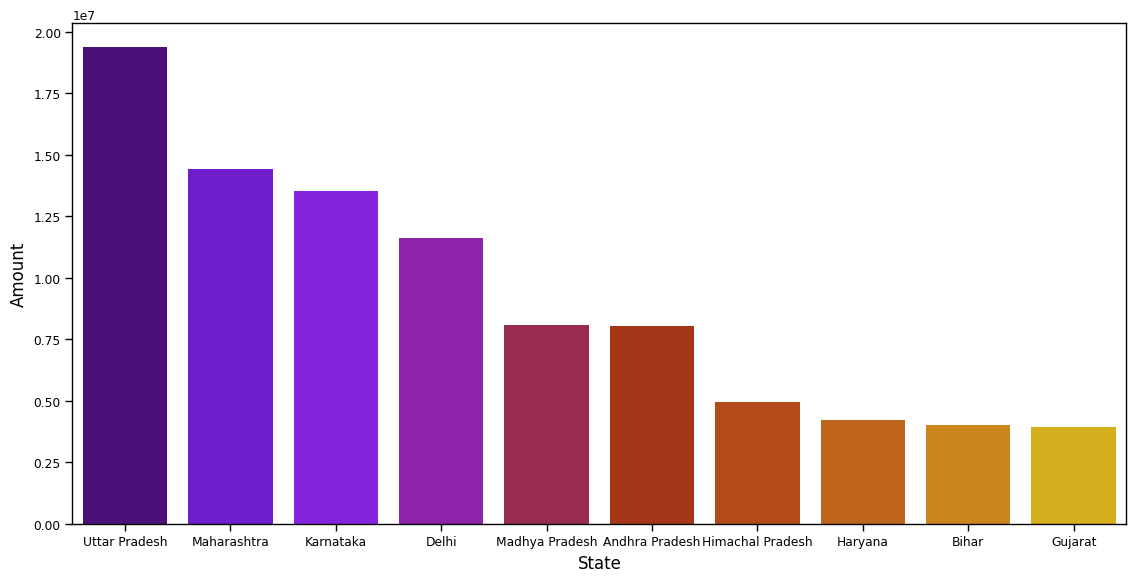

In [35]:

# total amount/sales from top 10 states


# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})


# grouping my state column based on amount column
cp= df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False).head(10)


# creating a bar plot
sns.barplot(x='State',y='Amount',data= cp, palette='gnuplot', hue= 'State', legend= False)

From the above graph we can see that the most of the orders and maximum sales are from the state of UP, Maharashtra, Karnataka, respectively

Marital Status

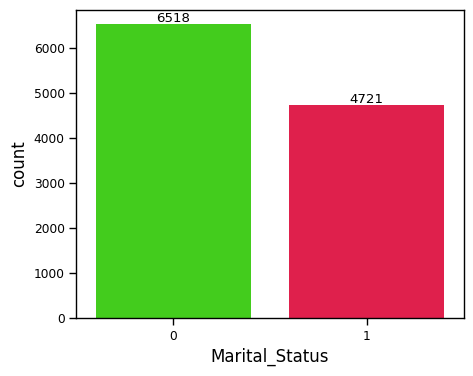

In [40]:
# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(5, 4))


# create the countplot to see the distribution of data
dp= sns.countplot(x= 'Marital_Status', data= df, palette='prism', hue= 'Marital_Status', legend= False)


# add lebels to the bars
for bar in dp.containers:
    dp.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

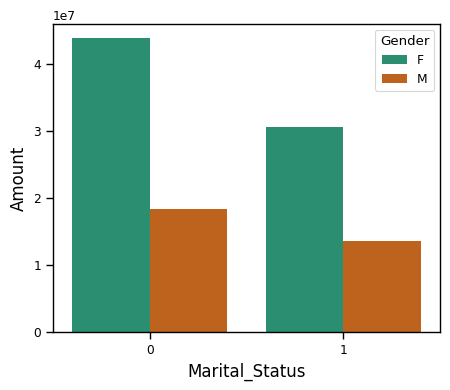

In [42]:
# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(5, 4))


# grouping my marital_status column based on amount column
cp= df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

# creating a bar plot
sns.barplot(x='Marital_Status', y='Amount', data= cp, palette='Dark2', hue= 'Gender' )

From the above graph we can see that most of the buyers are married(women) and have high purchasing power

Occupation

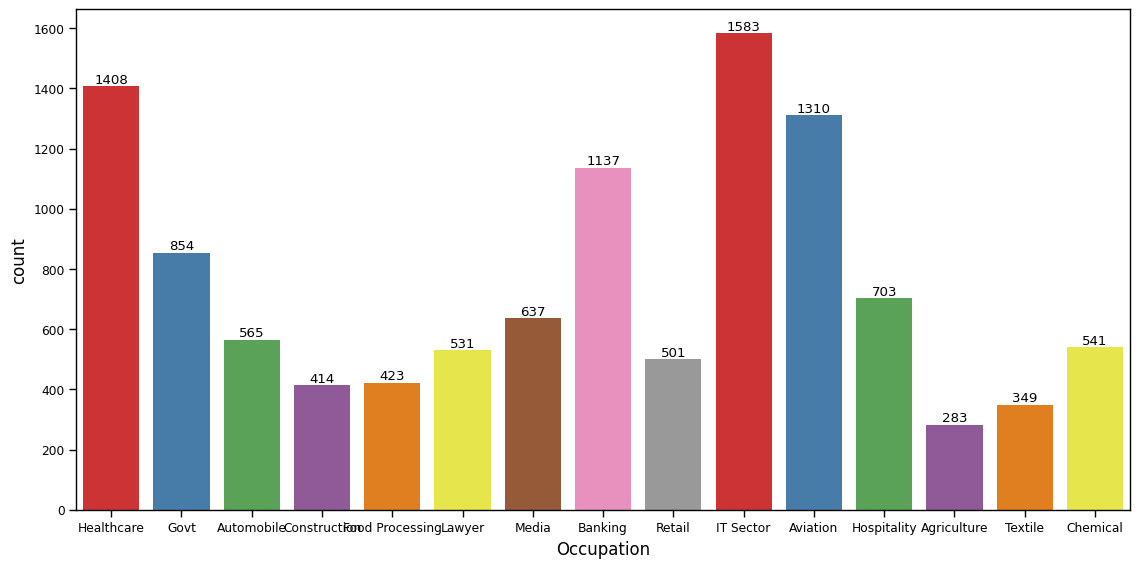

In [45]:
# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

# create the countplot to see the distribution of data
dp= sns.countplot(x='Occupation', data= df, palette='Set1', hue= 'Occupation', legend= False)

# add lebels to the bars
for bars in dp.containers:
    dp.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

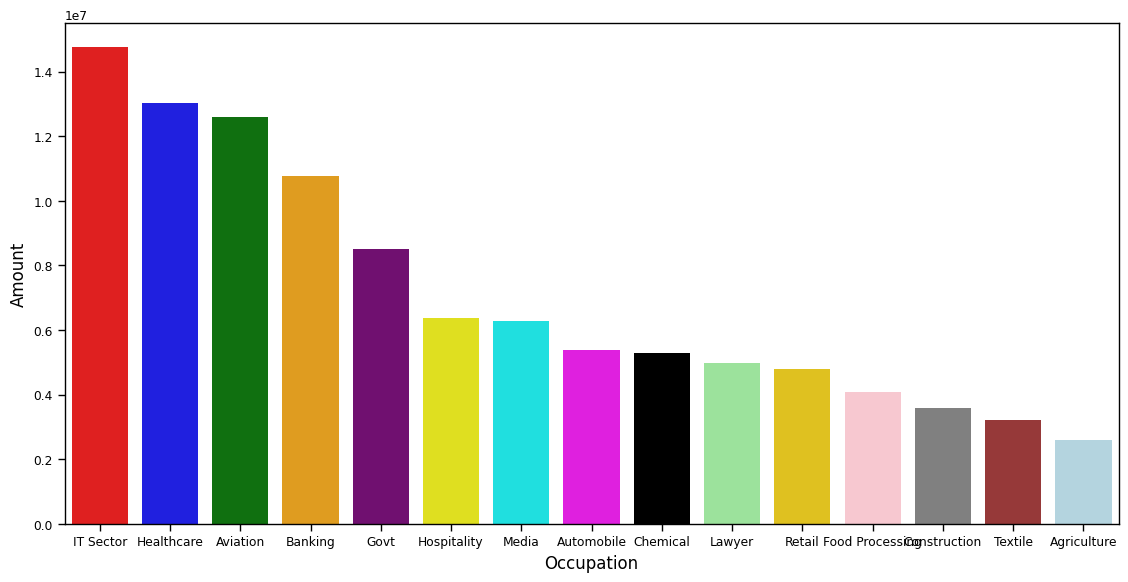

In [47]:
# define a color palette for the occupations
occup = ['red','blue','green','orange','purple','yellow','cyan','magenta','black','lightgreen','gold','pink','gray','brown','lightblue']

# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

# grouping my occupation column based on amount column
cp= df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

# creating a bar plot
sns.barplot(x='Occupation', y='Amount', data= cp, palette=occup, hue='Occupation', legend= False)

>>From the above graphs we can see that most of buyers are woring in IT Sector, Healthcare, Aviation, repectively



Product Category

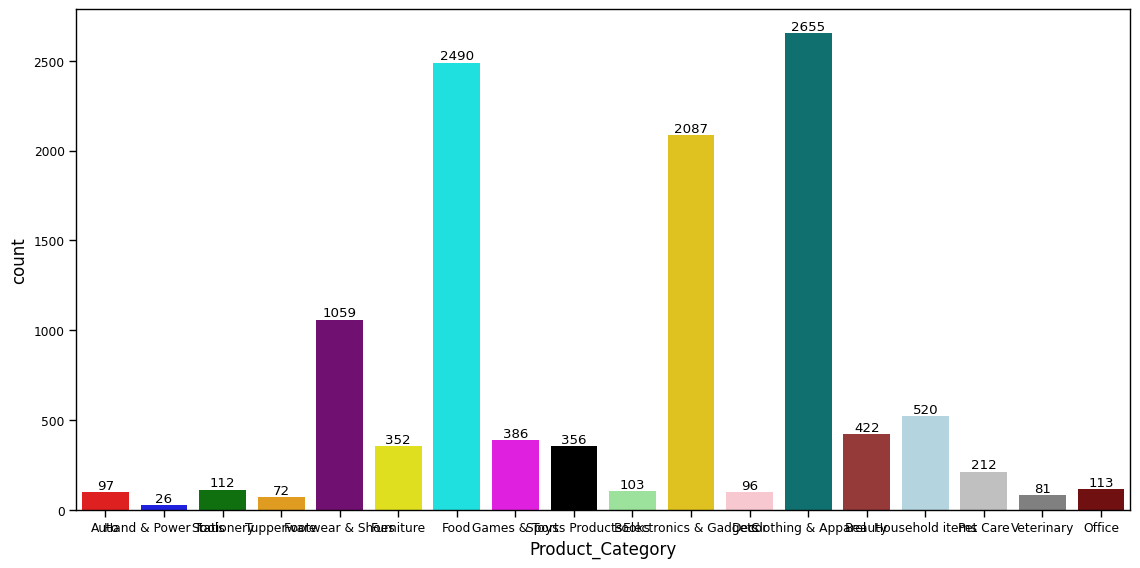

In [52]:
# define a color palette for the category
category = ['red','blue','green','orange','purple','yellow','cyan','magenta','black','lightgreen','gold','pink','teal','brown','lightblue','silver','gray','maroon']

# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

## create the countplot to see the distribution of data
dp= sns.countplot(x='Product_Category', data= df, palette= category, hue='Product_Category', legend= False)

# add lebels to the bars
for bars in dp.containers:
    dp.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

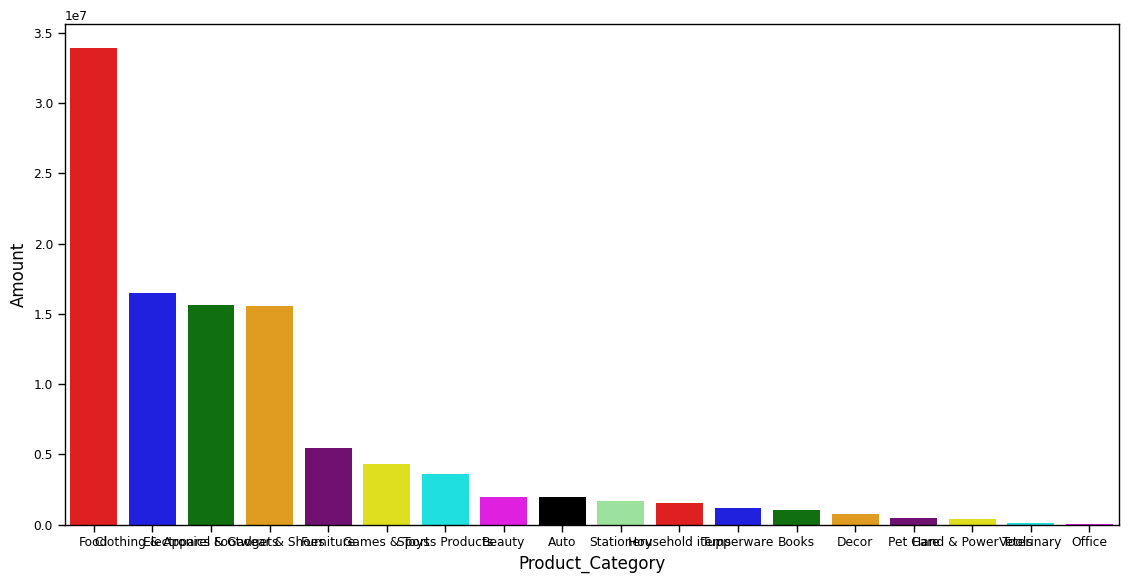

In [55]:

# define a color palette for the category
category = ['red','blue','green','orange','purple','yellow','cyan','magenta','black','lightgreen']

# Set the size of the plot (Adjust width and height as needed)
fig, ax= plt.subplots()
fig.set_size_inches(13.6,6.5)
sns.set_context('paper', rc= {"fpnt.size":12,"axes.titlesize":12, "axes.labelsize":12})

# grouping my category column based on amount column
cp= df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by= 'Amount', ascending=False)

# creating a bar plot
sns.barplot(x='Product_Category', y='Amount', data= cp, palette= category,  hue='Product_Category', legend= False)

From the above graphs we can see that most of the sold products are Food, Clothing & Apparel , Electronocs & Gadgets, respectively



Conclusions :

Married women, age group 26-35 yrs from UP, Maharastra and Karnataka working in IT Sector, Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics category